In [ ]:
%load_ext autoreload
%autoreload 2

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from waymo_object import WaymoObject, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [17]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


In [18]:
from avcv.utils import *

In [19]:
data_root = '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/'

In [20]:
# paths = glob('/data/waymo/training_kitti/calib/*.txt')

# out_train_txt = '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/train.txt'
# out_val_txt = '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/val.txt'
# if os.path.exists(out_train_txt):
#     os.remove(out_train_txt)
#     os.remove(out_val_txt)


# os.makedirs(os.path.dirname(out_train_txt), exist_ok=True)
# # with open(out_train_txt, 'w') as f:

# f = open(out_train_txt, 'w')
# f_val = open(out_val_txt, 'w')


# for i, path in enumerate(paths):
#     name = os.path.basename(path).split('.')[0]
#     if i<(0.9*len(paths)):
#         f.write(f'{name}\n')
#     else:
#         f_val.write(f'{name}\n')
        
# f.close()
# f_val.close()

In [21]:
paths = glob('/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/*')

In [22]:
paths

['/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/002120.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/003026.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/001057.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/007123.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/004014.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/008068.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/006180.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/006102.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/003162.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/003086.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/008036.txt',
 '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/label/001098.txt',
 '/fisheye_object/3dod/RTM3d

In [23]:
# len(paths)

In [24]:
data_root = '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo'

In [25]:
# dataset = kitti_object('../data/object', 'training')
dataset = WaymoObject(data_root)

data_idx = 6180
objects = dataset.get_label_objects(data_idx)
# objects = dataset.get_pred_objects(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape




In [26]:
#--plot lidar
# pc_velo = dataset.get_lidar(data_idx)

# fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
# show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
# fig_3d
# img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
# img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

# fig_lidar = plt.figure(figsize=(14, 7))
# ax_lidar = fig_lidar.subplots()
# ax_lidar.imshow(img_lidar)
# plt.show()

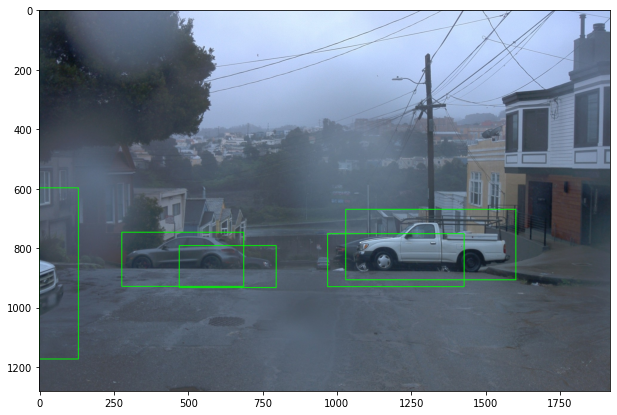

In [27]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

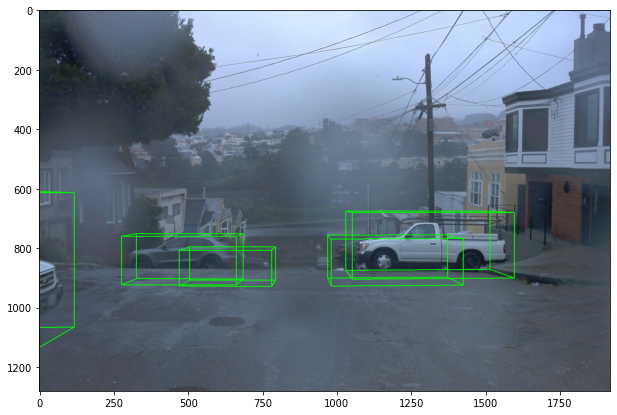

In [28]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

In [ ]:
# img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

# fig_bev = plt.figure(figsize=(7, 14))
# ax_bev = fig_bev.subplots()
# ax_bev.imshow(img_bev)
# plt.show()

In [ ]:
!